<a href="https://colab.research.google.com/github/MuhammadSyahidan/PCVK_2023/blob/main/Week_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama: Muhammad Syahidan Nuron J

>


NIM: 2141720095

>


Kelas: 3B

In [14]:
import numpy as np
import pandas as pd
import cv2 as cv
from google.colab.patches import cv2_imshow # for image display
from skimage import io
from skimage import transform
from PIL import Image
import matplotlib.pylab as plt
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


1. Buat Gamma Correction

 Gamma Correction pada citra 
----------------------------------
Masukkan nilai Gamma: 3


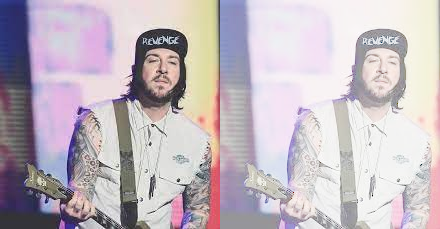

In [3]:
print(' Gamma Correction pada citra ')
print('----------------------------------')
try:
 gamma = int(input('Masukkan nilai Gamma: '))
except ValueError:
 print('Error, not a number')
original = cv.imread('/content/sample_data/zakik.jpg')
gamma_image = np.zeros(original.shape, original.dtype)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      gamma_image[y,x,c] = np.clip(255 * pow  (original[y,x,c] / 255, (1 / gamma)), 0, 255)

final_frame = cv.hconcat((original, gamma_image))
cv2_imshow(final_frame)

2. Buat Simulasi Image Depth

 Simulasi Image Depth  
--------------------------
Masukkan nilai Bit Depth: 1


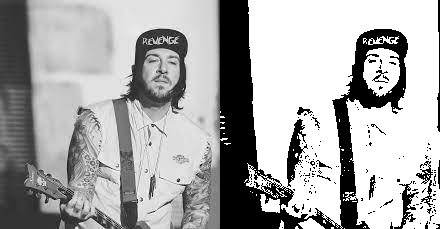

In [10]:
original = cv.imread('/content/sample_data/zakik.jpg', cv.IMREAD_GRAYSCALE)
gamma_image = np.zeros(original.shape, original.dtype)

print(' Simulasi Image Depth  ')
print('--------------------------')
try:
  bd = float(input('Masukkan nilai Bit Depth: '))
except ValueError:
  print('Error, not a number')

bit = 2**bd
level = 255 / (bit - 1)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    gamma_image[y, x] = np.clip(round(original[y, x] / level) * level, 0, 255);

final_frame = cv.hconcat((original, gamma_image))
cv2_imshow(final_frame)


3. Buat modul Average Denoising

Average Denoising
----------------------------------
Masukkan nilai: 5
29.09902709343377


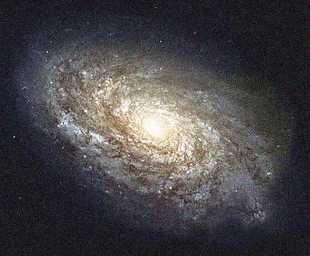

In [11]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import glob

print('Average Denoising')
print('----------------------------------')
try:
 photo_number = int(input('Masukkan nilai: '))
except ValueError:
 print('Error, not a number')

cv_img = []
for img in glob.glob('/content/drive/MyDrive/PCVK/noises/*.jpg'):
  n= cv2.imread(img)
  cv_img.append(n)

avg_denoised_img = np.mean(cv_img[:photo_number], axis=0).astype(np.uint8)

def PSNR(img1, img2):
  mse = np.mean((img1 - img2) ** 2)
  if(mse == 0): # MSE 0 maka tidak ada noise sama sekali, sehingga PSNR tidak memiliki arti
    return 100
  max_pixel = 255.0
  psnr = 20 * np.log10(max_pixel / np.sqrt(mse))
  return psnr

print(PSNR(cv_img[0], avg_denoised_img))
cv2_imshow(avg_denoised_img)

4. Image Masking

And

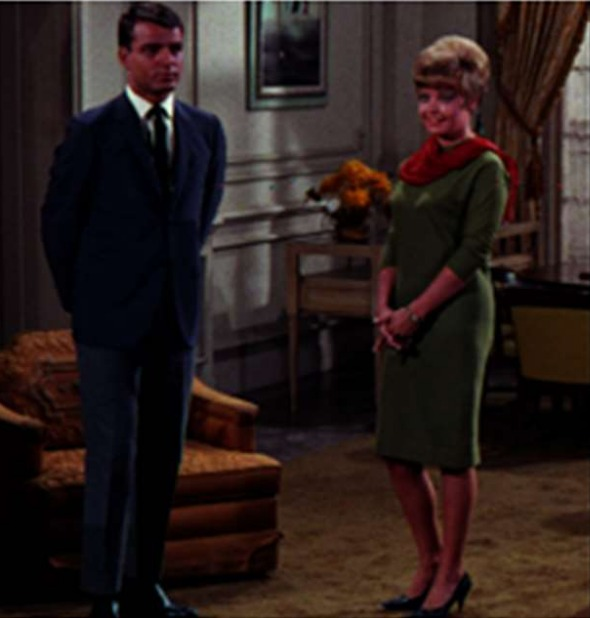

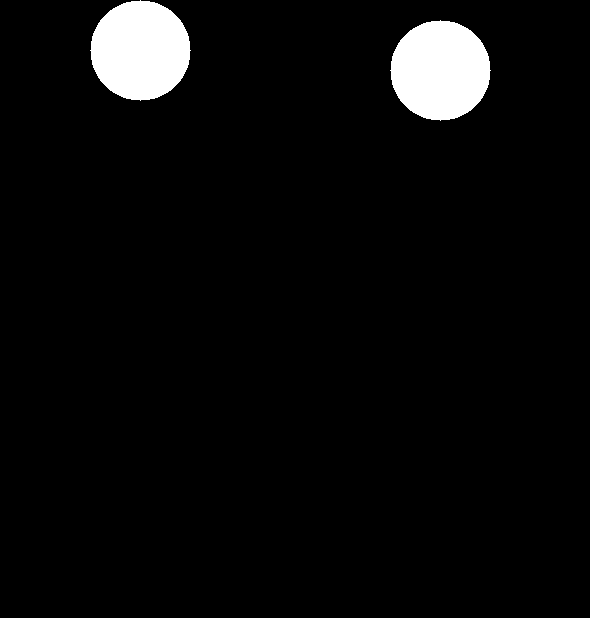

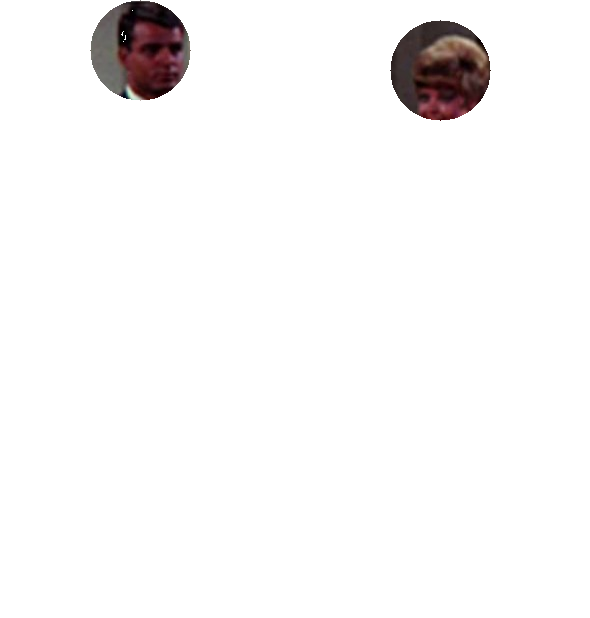

In [23]:
# import required libraries
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow
from PIL import Image

# Read an input image as a gray image
img = cv.imread('/content/sample_data/pasangan.jpeg')

# create a mask
mask = np.zeros(img.shape[:2], np.uint8)
cv.circle(mask, (140, 50), 50, 255, -1)
cv.circle(mask, (440, 70), 50, 255, -1)

masked = cv.bitwise_and(img,img,mask = mask)

tmp = cv.cvtColor(masked, cv.COLOR_BGR2GRAY)
_,alpha = cv.threshold(tmp,0,255,cv.THRESH_BINARY)
b, g, r = cv.split(masked)
rgba = [b,g,r, alpha]
dst = cv.merge(rgba,4)
cv.imwrite('result.png',dst)

cv2_imshow(img)
cv2_imshow(mask)
cv2_imshow(dst)

Operator

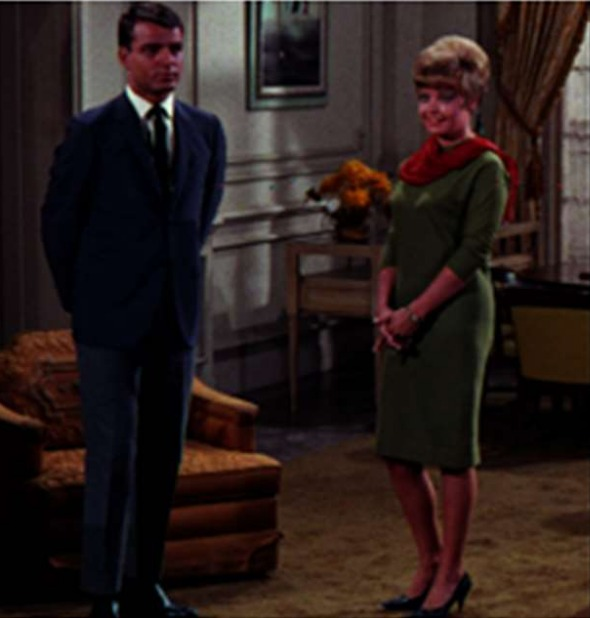

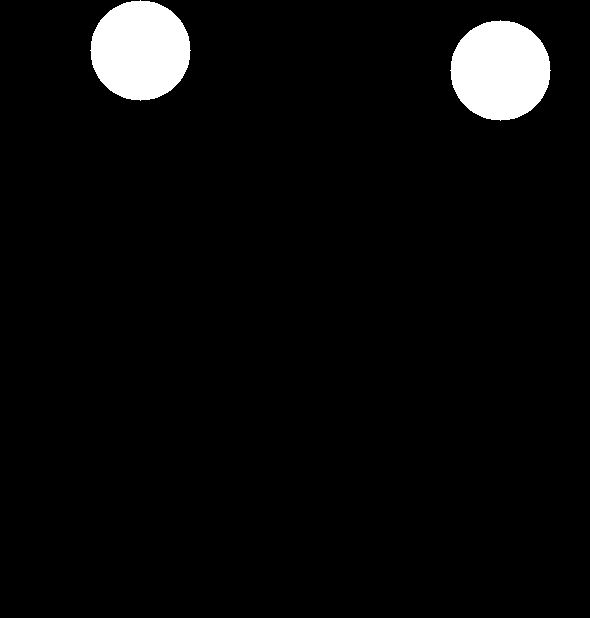

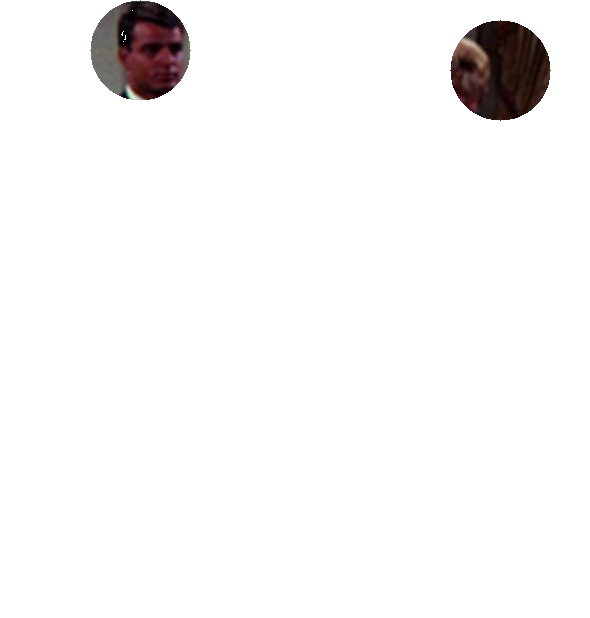

In [19]:
# import required libraries
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow
from PIL import Image

# Read an input image as a gray image
img = cv.imread('/content/sample_data/pasangan.jpeg')

# create a mask
mask = np.zeros(img.shape[:2], np.uint8)
cv.circle(mask, (140, 50), 50, 255, -1)
cv.circle(mask, (500, 70), 50, 255, -1)

masked = cv.bitwise_and(img,img,mask = mask)

tmp = cv.cvtColor(masked, cv.COLOR_BGR2GRAY)
_,alpha = cv.threshold(tmp,0,255,cv.THRESH_BINARY)
b, g, r = cv.split(masked)
rgba = [b,g,r, alpha]
dst = cv.merge(rgba,4)
cv.imwrite('result.png',dst)

cv2_imshow(img)
cv2_imshow(mask)
cv2_imshow(dst)

Lakukan Percobaan dengan operator or

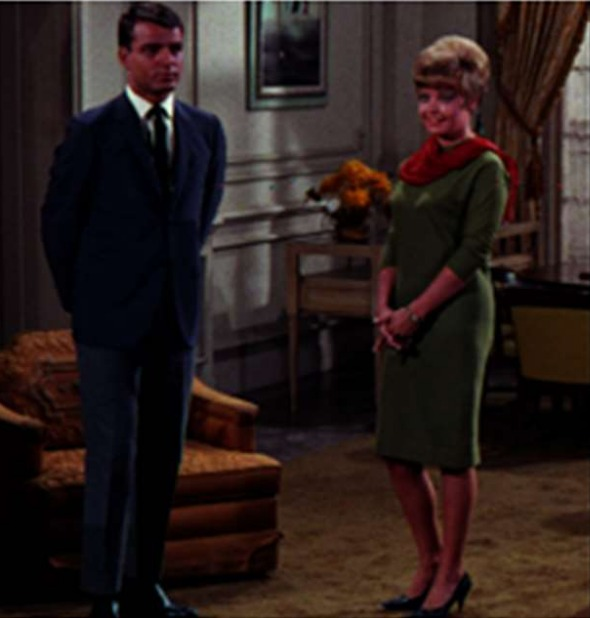

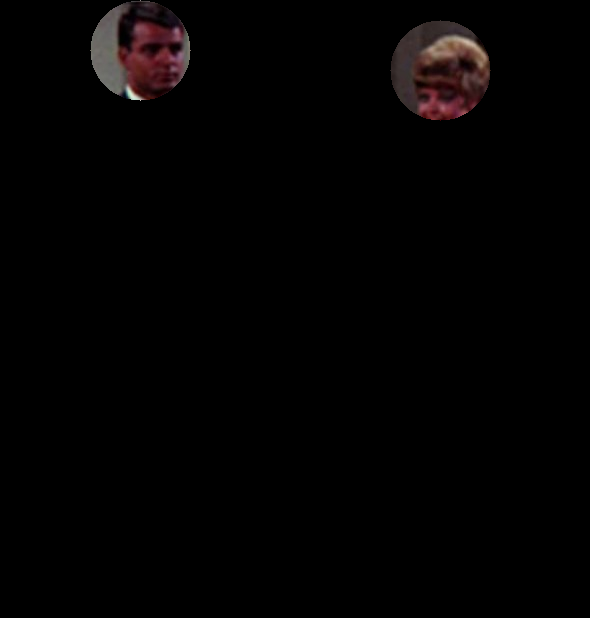

In [24]:
masked = cv.bitwise_or(img,img,mask = mask)

cv.imwrite('or.png',masked)

cv2_imshow(img)
cv2_imshow(masked)

not

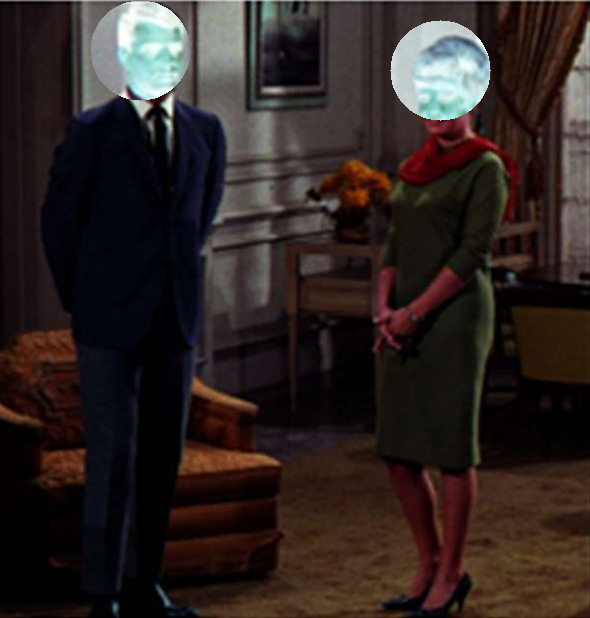

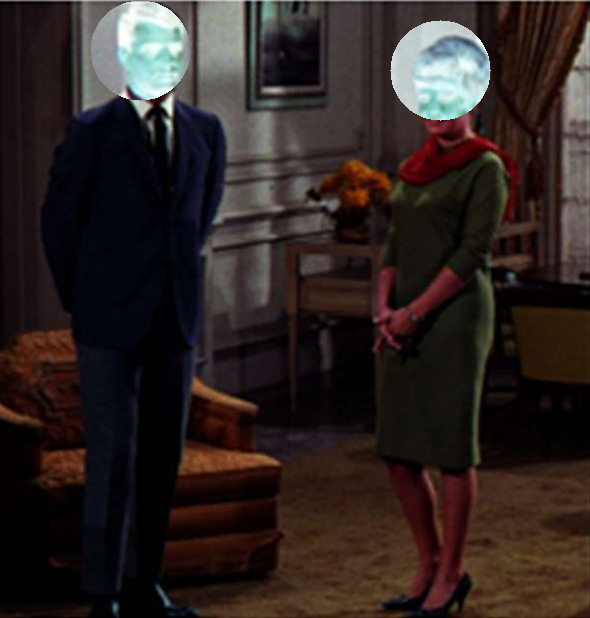

In [25]:
masked = cv.bitwise_not(img,img,mask = mask)

cv.imwrite('not.png',masked)

cv2_imshow(img)
cv2_imshow(masked)

xor

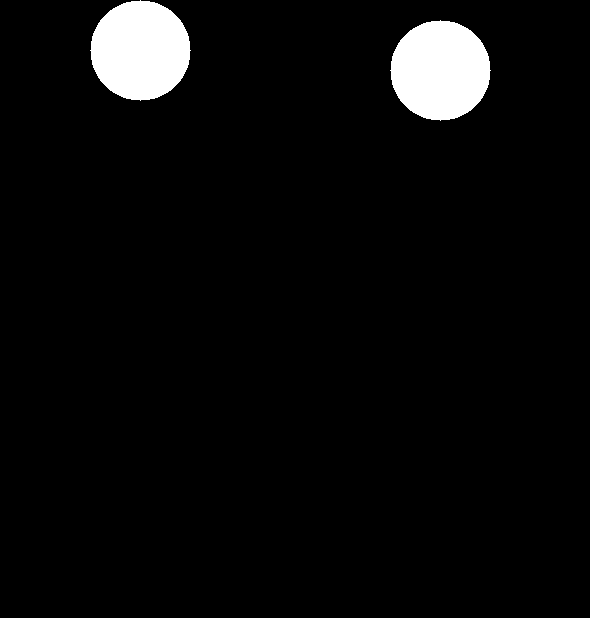

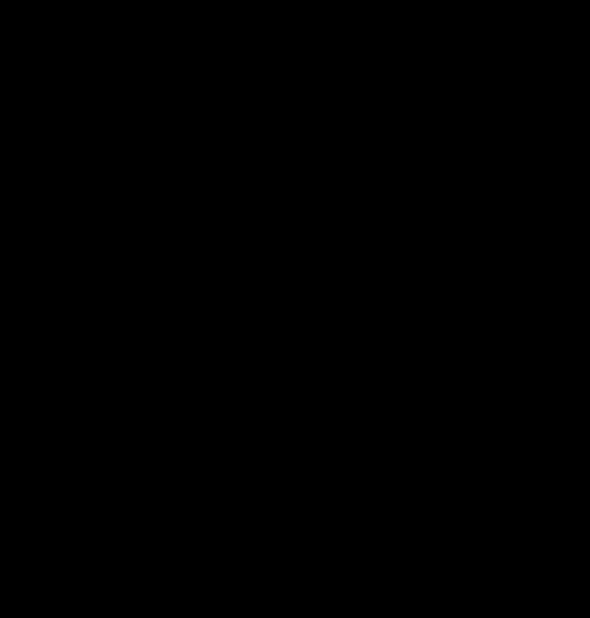

In [26]:
masked = cv.bitwise_xor(img,img,mask = mask)

cv.imwrite('nand.png',masked)
cv2_imshow(mask)
cv2_imshow(masked)